# Results from using the similarity down selection (SDS) algorithm

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.ticker import FormatStrFormatter

In [2]:
names = ['Harmine', '1-Methylguanosine', 'Sphingosine', 'riboflavin', 'Mandelonitrile', 'Creatinine', 'Methyleugenol',
        'N6-methyladenosine', 'Cholic Acid', 'Astilbin', 'SDGRG', 'Biliverdin', 'Anthranilic acid', 'Aminohippuric acid',
        '3\'-O-methylguanosine', 'Sucrose', 'Naringin', 'PE 16:1/16:1']
adducts = ['+H','+H','+H','+H','+H','+Na','+Na','+Na','+Na','+Na','+Na','+Na', '-H', '-H', '-H', '-H', '-H', '-H']
molids = ['02', '03', '04', '05', '10', '11', '12', '14', '16', '17', '18', '19', '21', '22', '24', '25', '28', '29']
hexs = ['f90000', 'f95200', 'f98800', 'f9ae00', 'f9db00', 'ecf900', '9df900', '00f94a', '00f9c7', '00f4f9', '00b6f9',
        '007cf9', '0014f9', 'ae00f9', 'f900f9', 'f90091', 'a5a5a5', 'e3e3e3']

### 4 panel figures for every molecule:  
#### First panel is the result of applying LE, BW, and SA when grabbing the first n most dissimilar conformers.  
#### Second panel is the usual MC of LE and BW on randomly selected conformers 
#### Third panel is the usual ccs vs energy "cloud" 
#### Fourth panel is every conformer's ccs, sorted from the most dissimilar to the most similar conformer 

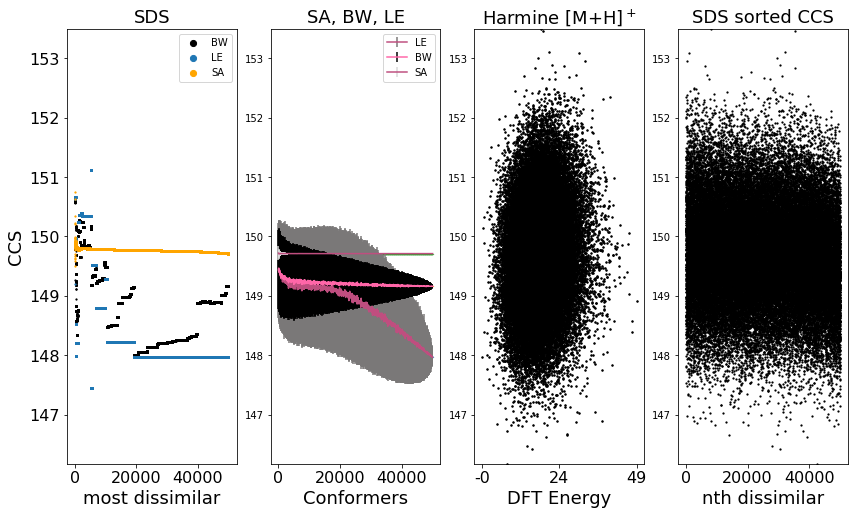

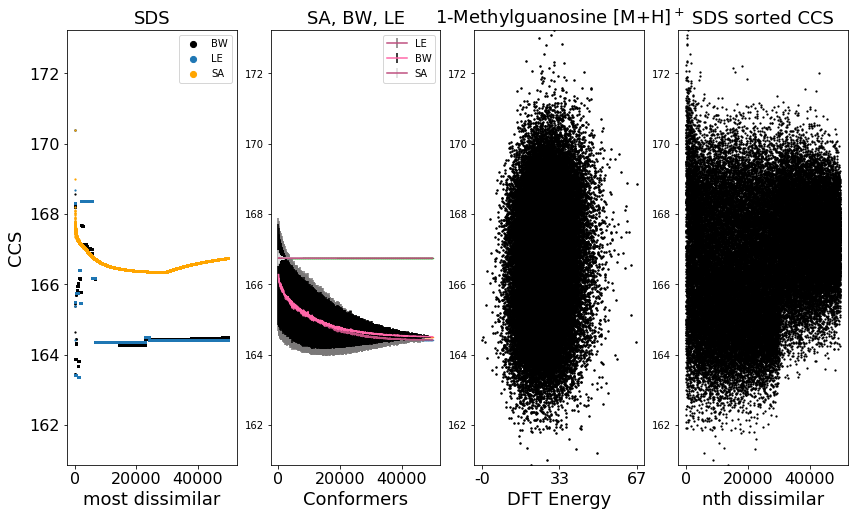

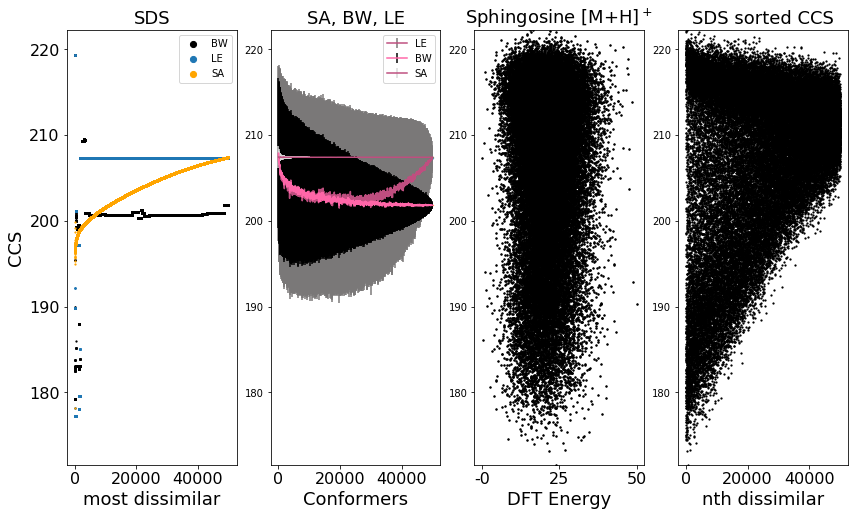

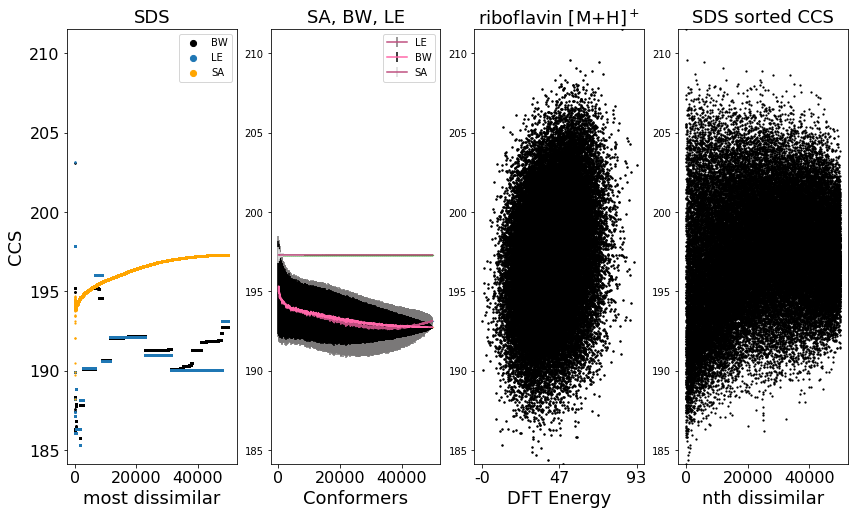

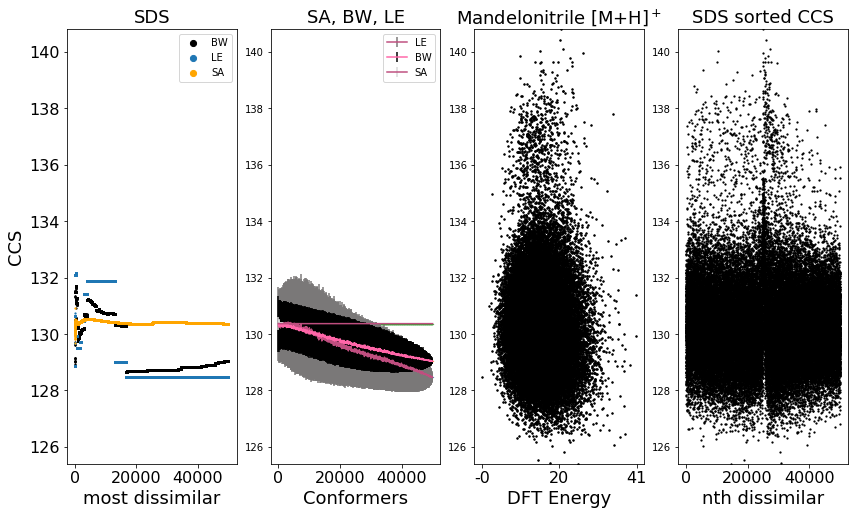

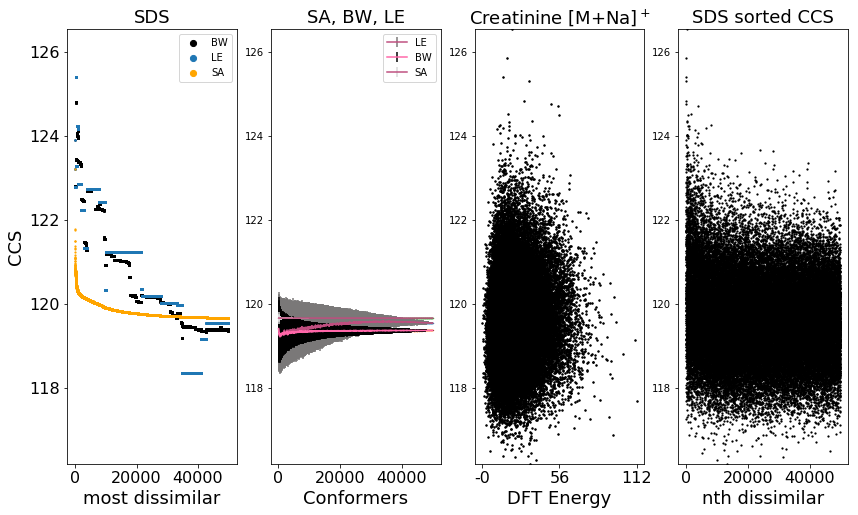

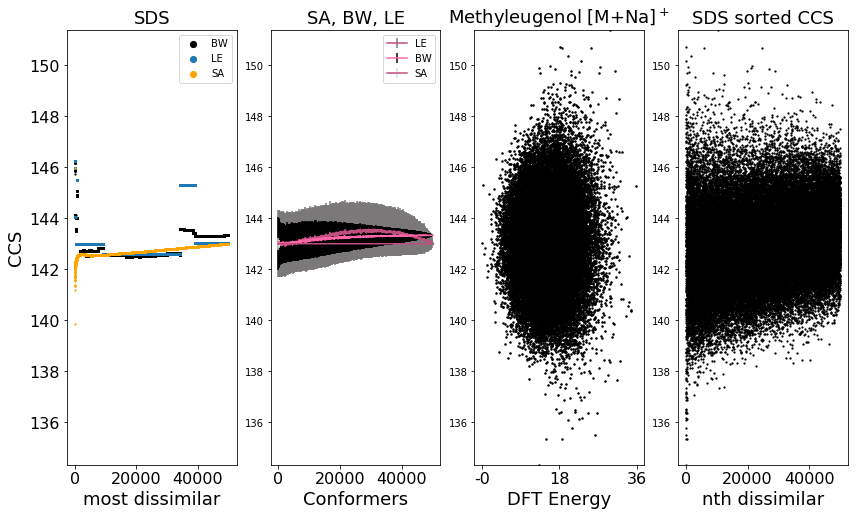

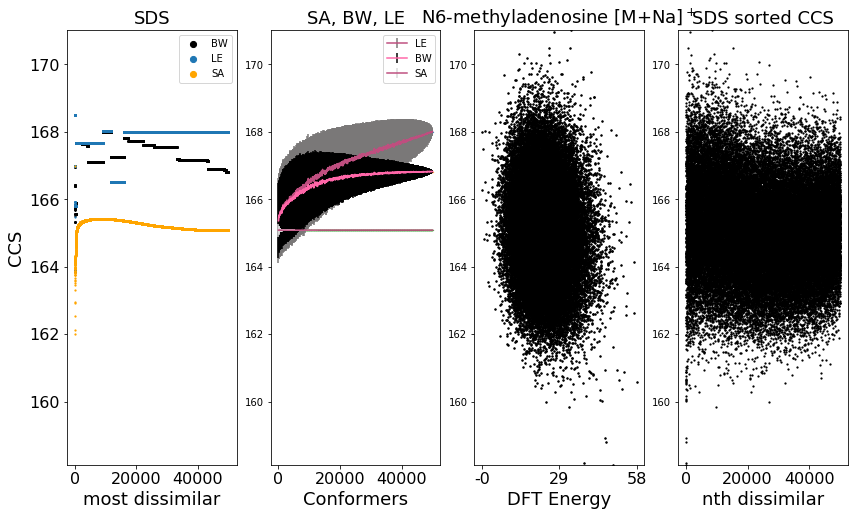

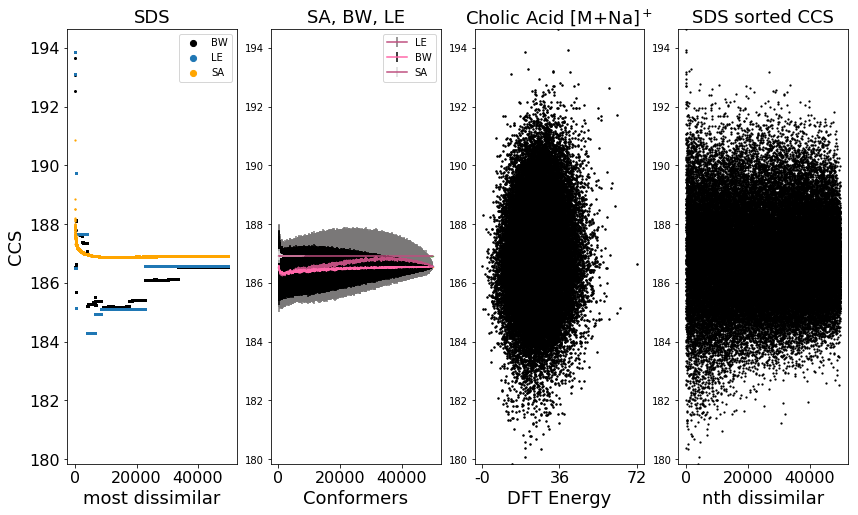

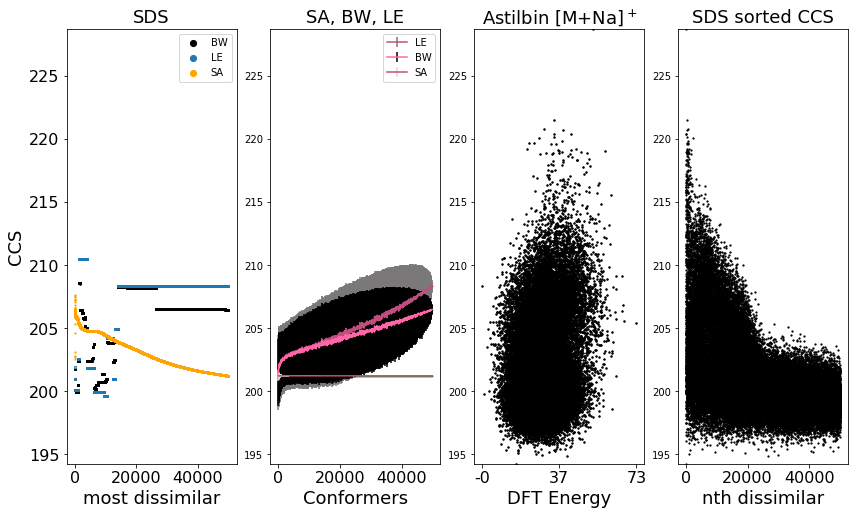

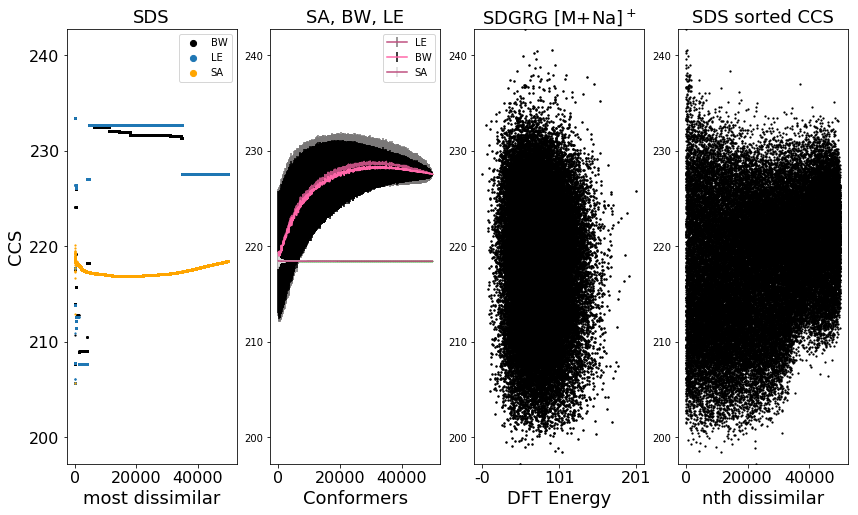

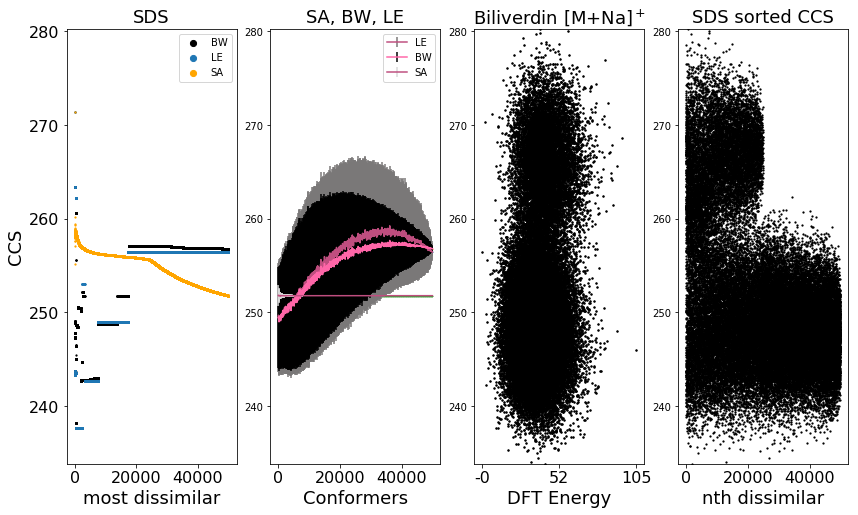

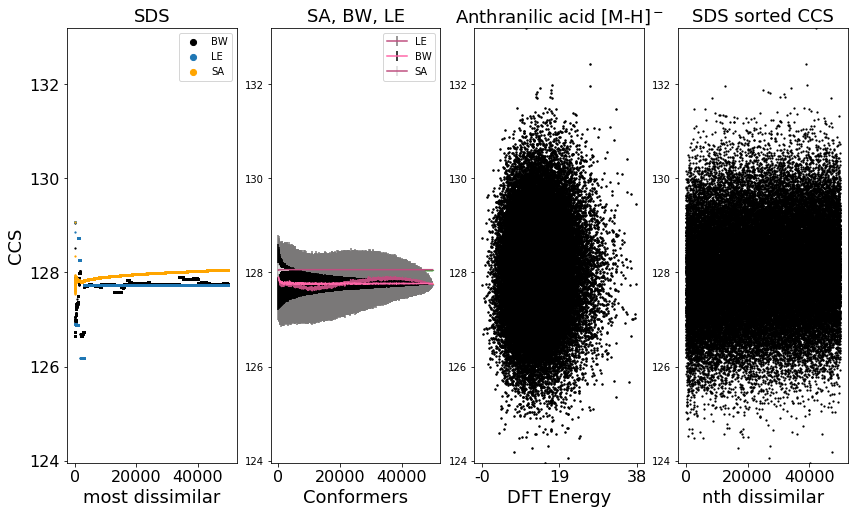

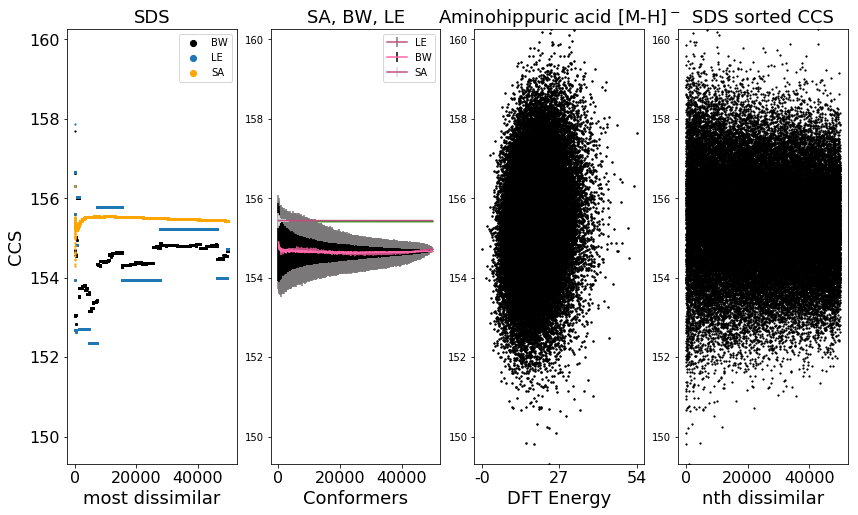

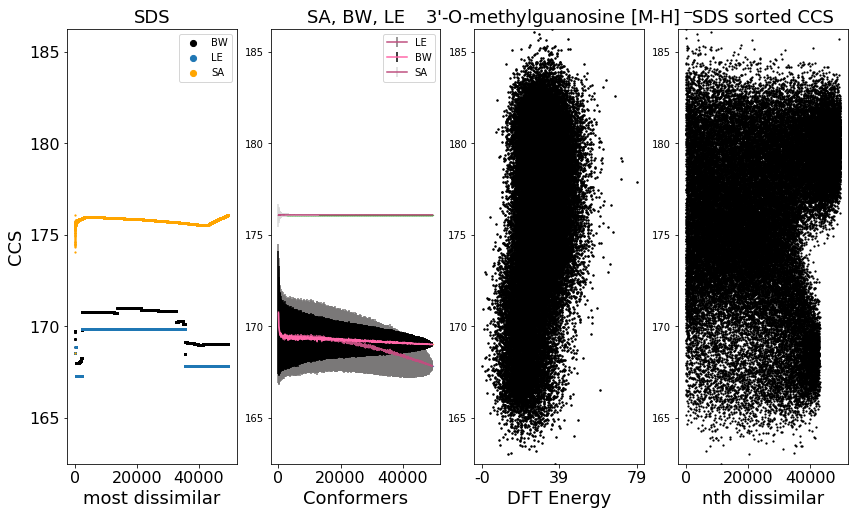

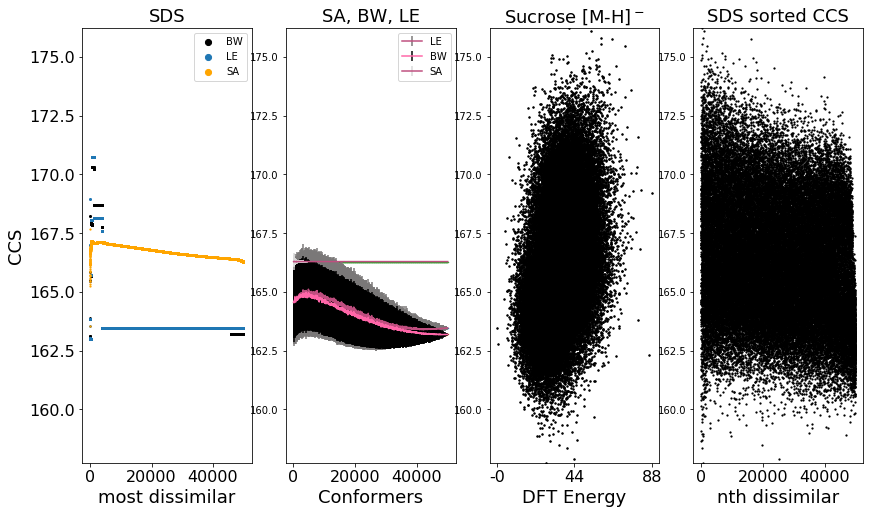

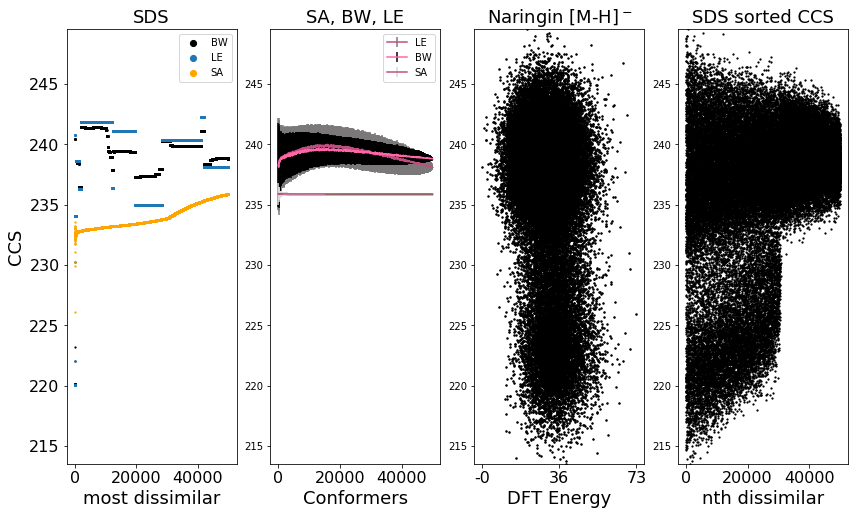

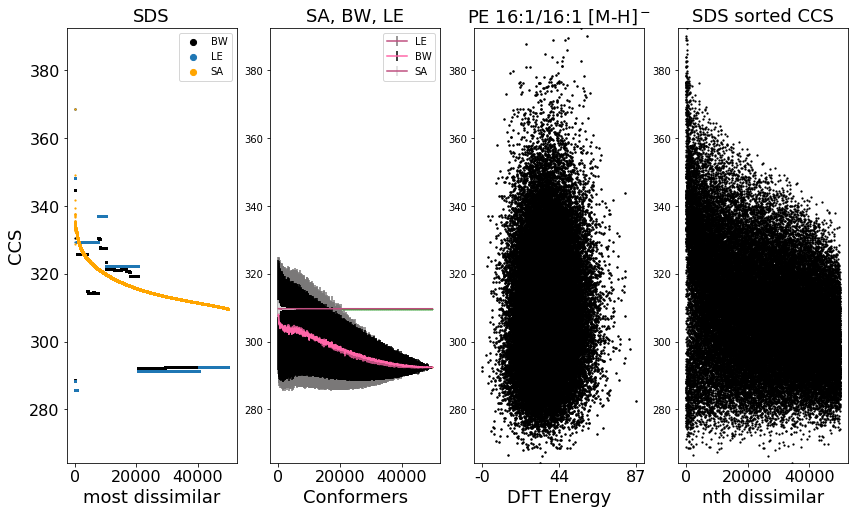

In [5]:
N = 50000

for i, ID in enumerate(molids[:]):
    plt.figure(figsize=(14,8))
    
    ####------------
    # Plot n dissimilar straight-pick results
    plt.subplot(1,4,1)
    try:
        ndisdf = pd.read_csv(f'../data/SDS/NDis/molid{ID}_full_dissm_logsum.csv')
    except:
        continue
    bw = ndisdf['BW CCS'].astype('float')
    le = ndisdf['Lowest Energy CCS'].astype('float')
    sa = ndisdf['Simple Average'].astype('float')
    ccs = ndisdf['CCS'].astype('float')
    
    n = ndisdf['n Dissimilar'].values.astype('int')
    plt.scatter(n, bw, c='black', s=1.5, label='BW')
    plt.scatter(n, le, s=1.5, label='LE')
    plt.scatter(n, sa, c='orange', s=1.5, label='SA')
    plt.legend(markerscale=5)
    
    # Set y axis range so both figures are directly comparible
    ymin = np.min([ccs.min(), le.min()])
    ymax = np.max([ccs.max(), le.max()])
    plt.ylim(ymin, ymax)
    plt.xlabel('most dissimilar', fontsize=18)
    plt.ylabel('CCS', fontsize=18)
    plt.title('SDS', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    ####------------
    # Plot boltzmann weighted and lowest energy MC results
    plt.subplot(1,4,2)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='#bf4e7f', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='#ff66a8', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='#bf4e7f', ecolor='#d9d9d9', label='SA') #7a7878
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.legend()
    
    ####------------
    # Plot CCS vs DFT energy
    ax4 = plt.subplot(1,4,3)
    edf = pd.read_csv(f'../data/molid{ID}_ccs.csv')   
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently is meaningless to compare to each other
    edf['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    min = edf['dft_energy'].min()
    edf['dft_energy'] = edf['dft_energy'] - min
    
    # Generate color by density
    x = edf['dft_energy']
    y = edf['ccs']
    #xy = np.vstack([x,y]) #uncomment for color density
    #z = gaussian_kde(xy)(xy) #uncomment for color density
    z = 'black'

    plt.scatter(x, y, c=z, s=2.2)
    plt.ylim(ymin, ymax)
    plt.xlabel('DFT Energy', fontsize=18)
    plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax4.set_xticks(xtic)
    
        
    ####------------
    # Plot CCS of every conformer sorted from most dissimilar to most similar, 
    # as sorted by nDisConf.py using the (more accurate and faster) heuristic algorithm
    plt.subplot(1,4,4)
    plt.scatter(ndisdf['n Dissimilar'].values.astype('int'), ccs, c='black', s=1.5)
    plt.ylim(ymin, ymax)
    plt.xlabel('nth dissimilar', fontsize=18)
    plt.title('SDS sorted CCS', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)

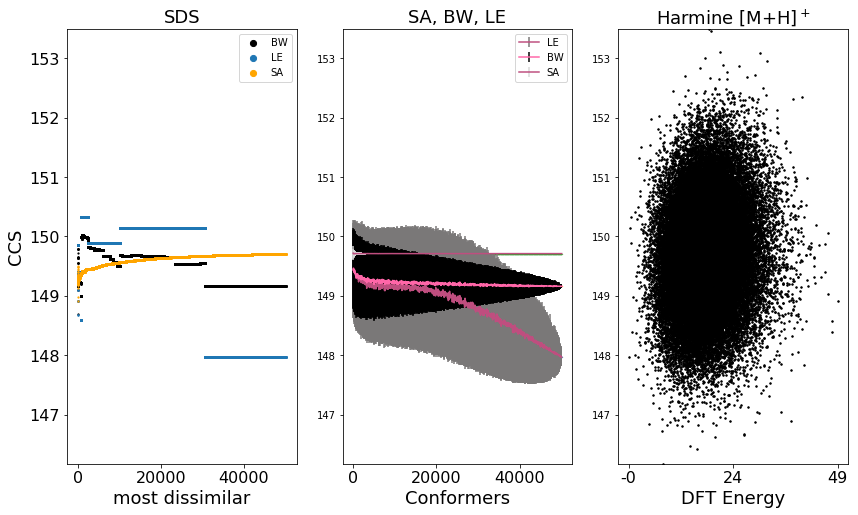

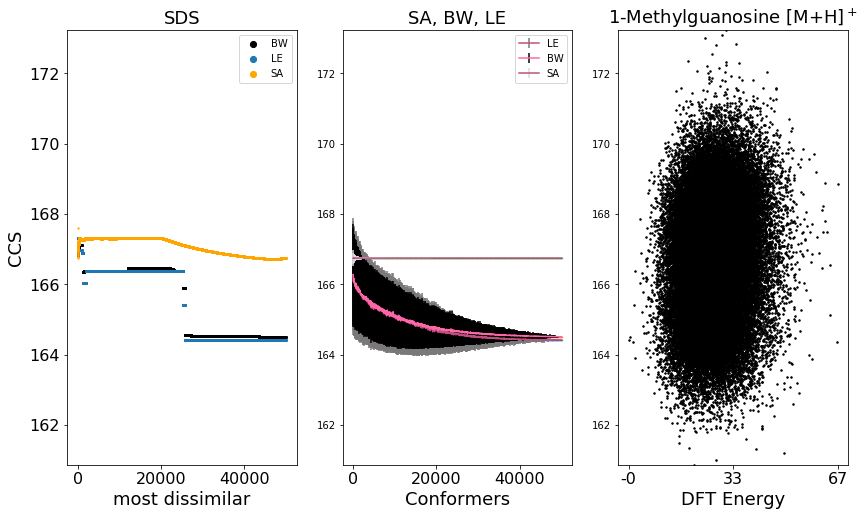

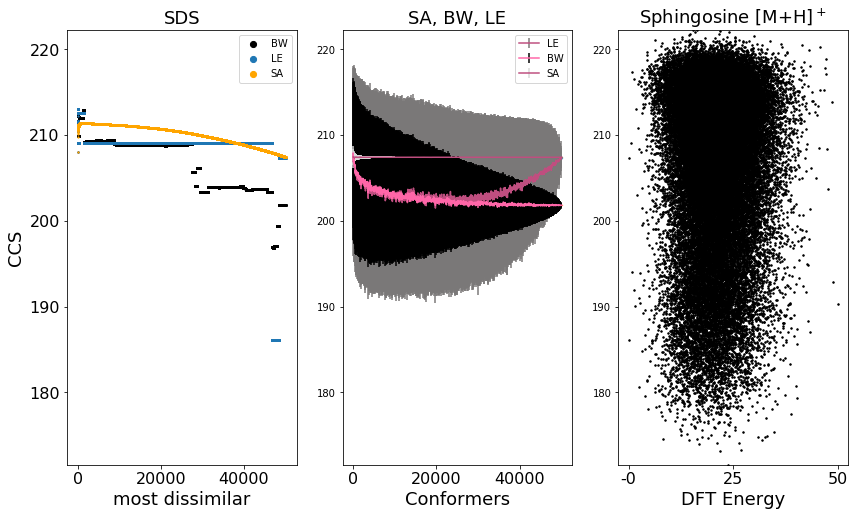

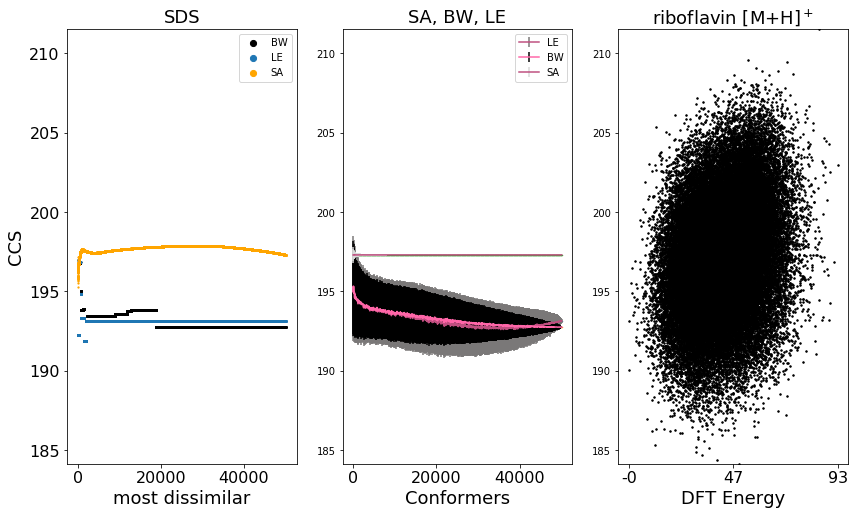

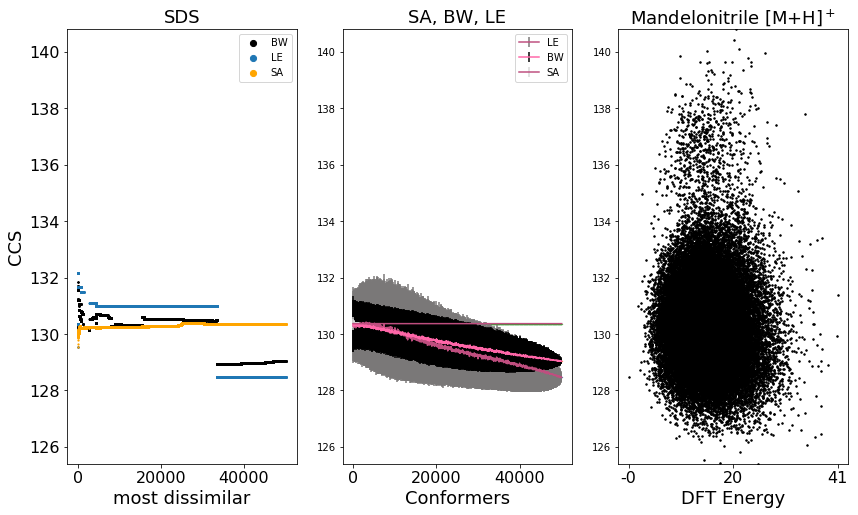

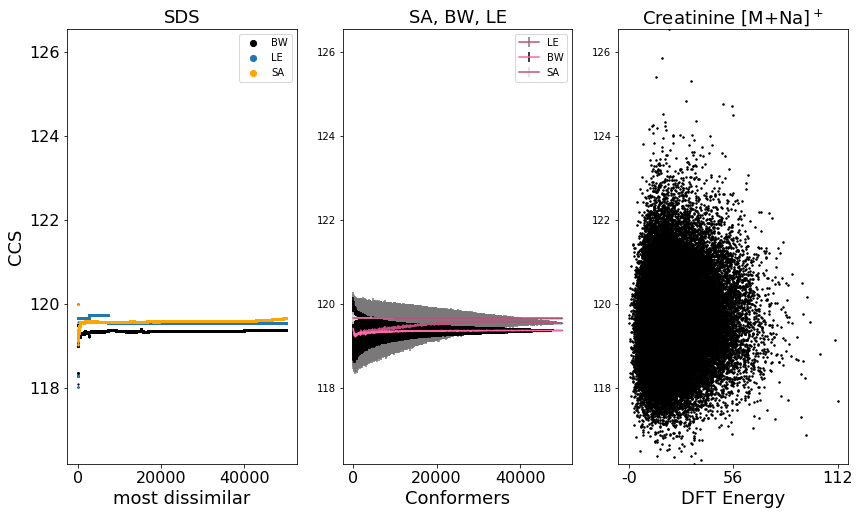

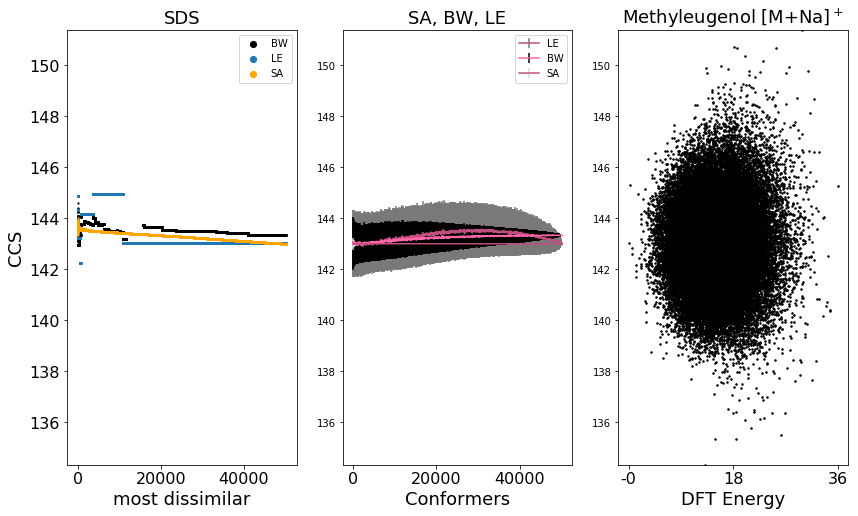

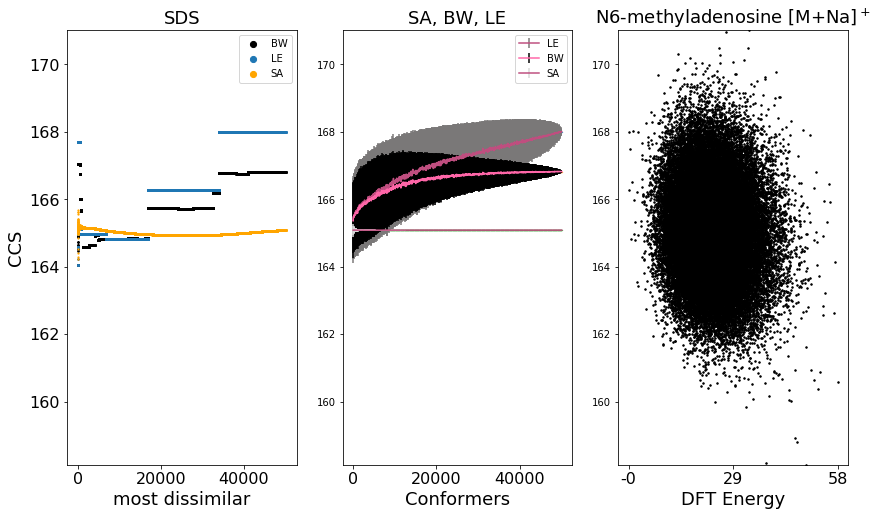

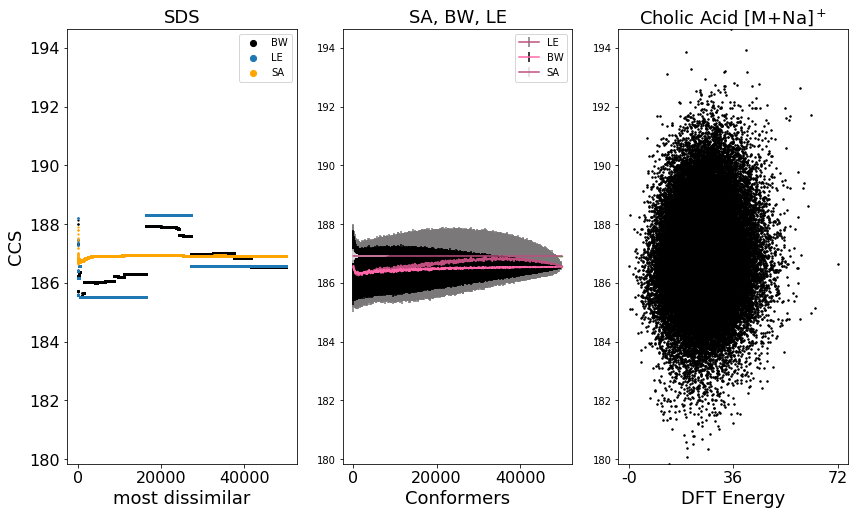

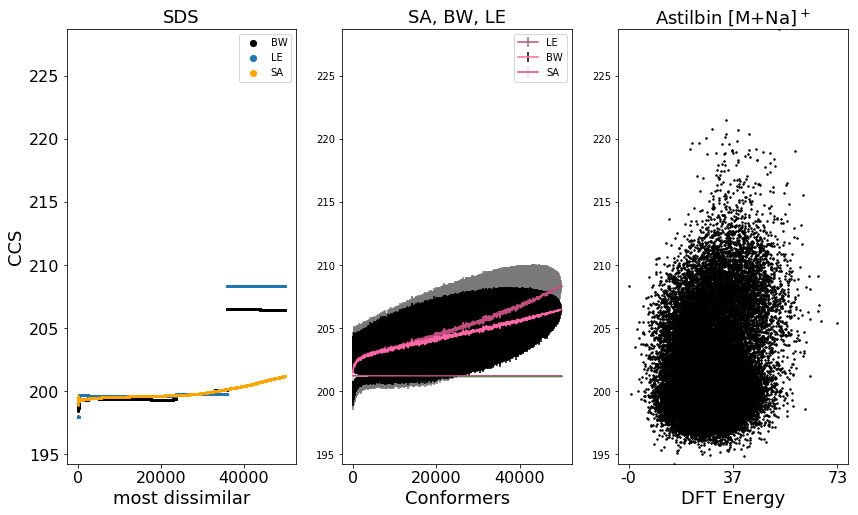

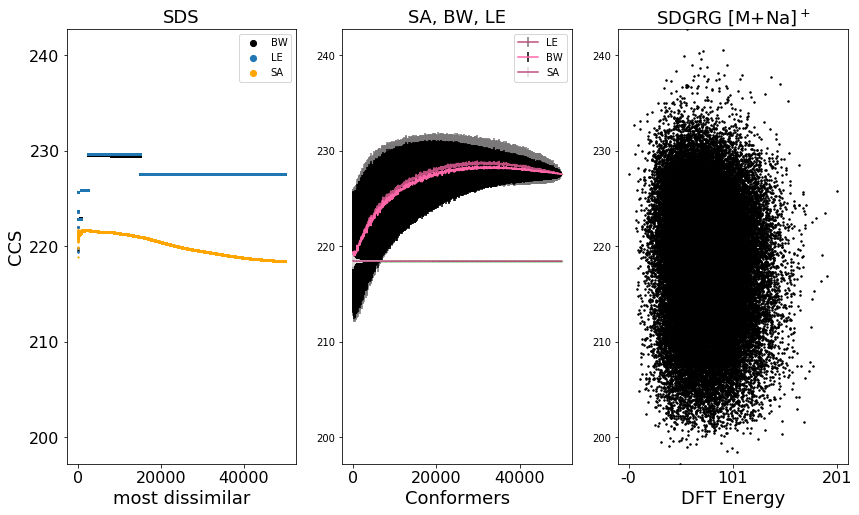

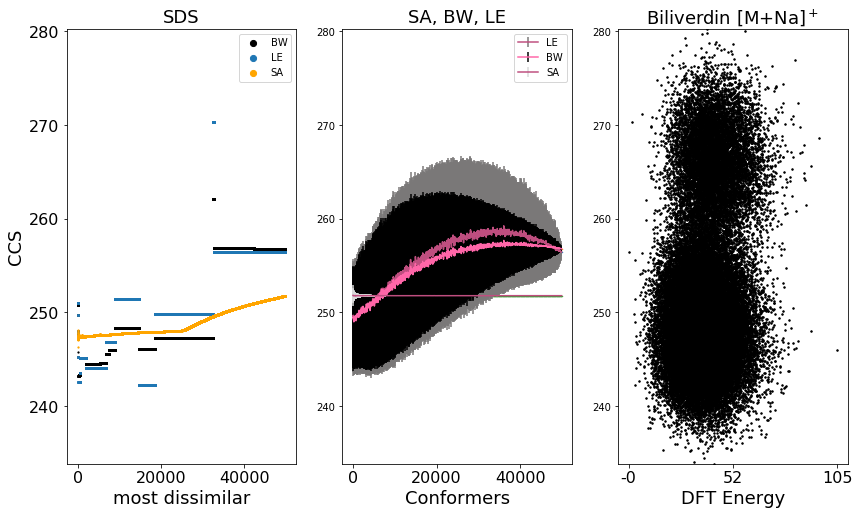

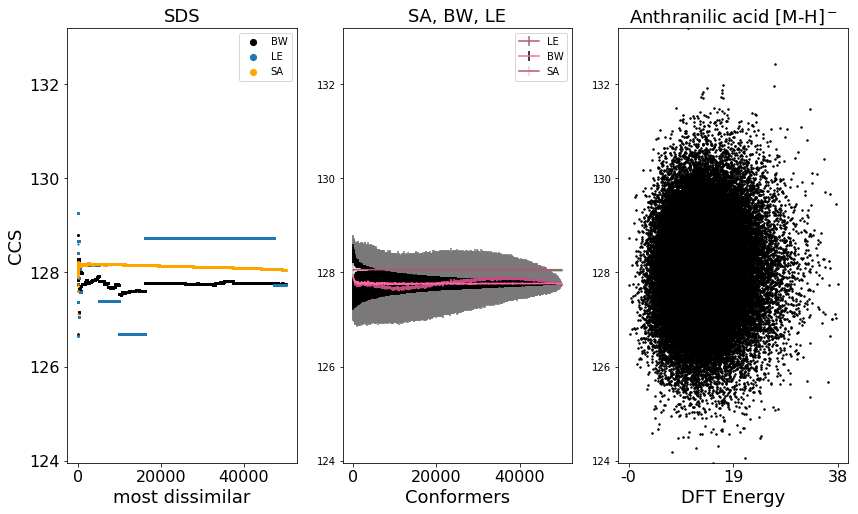

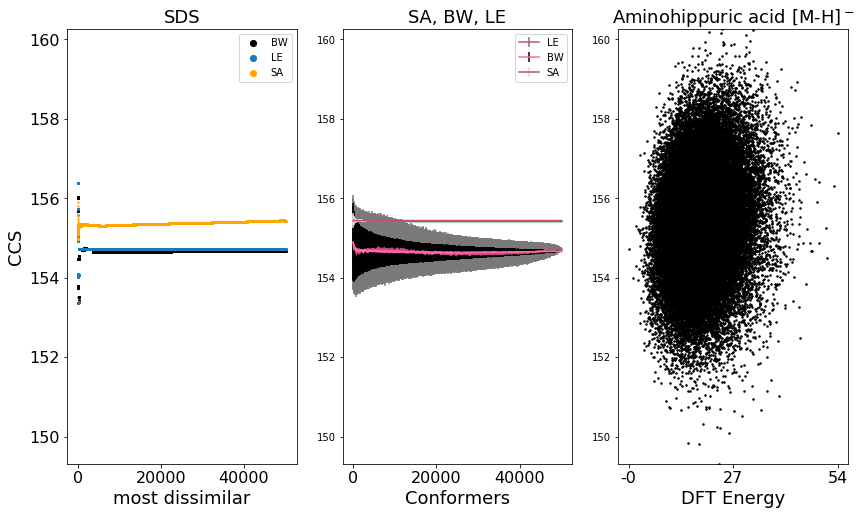

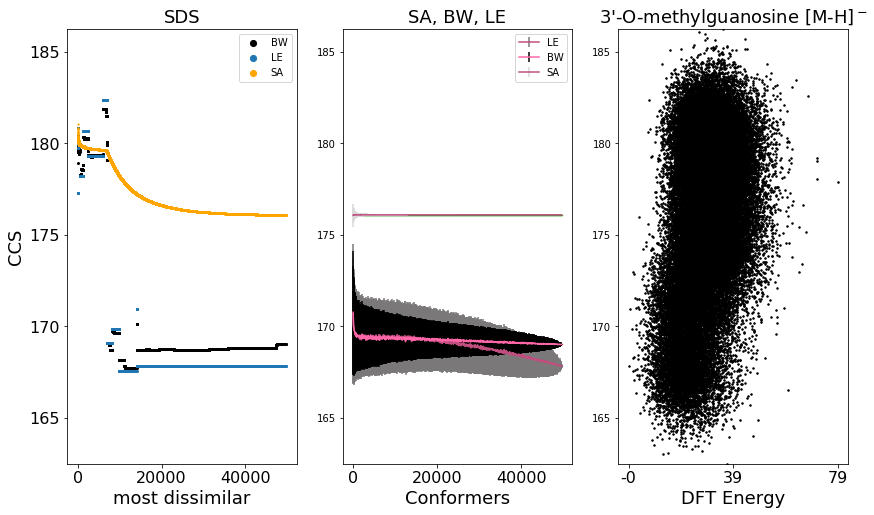

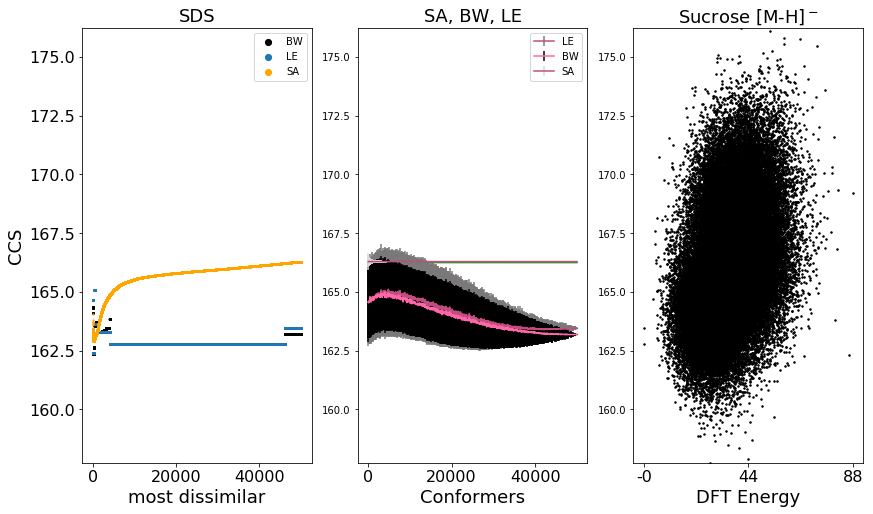

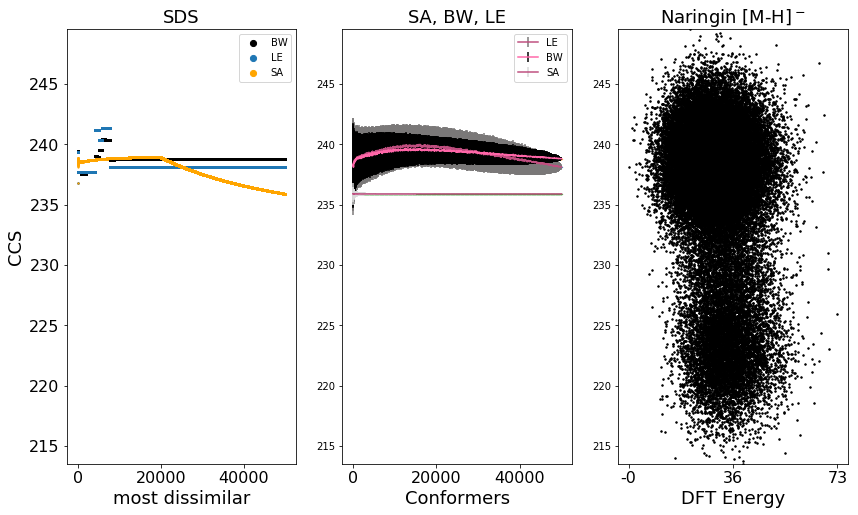

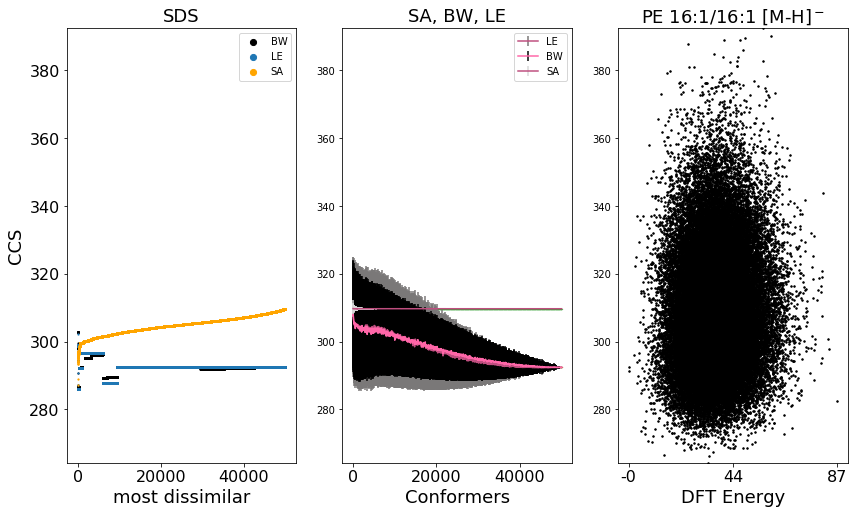

In [7]:
# Same as above but going from most similar to most dissimilar

N = 50000

for i, ID in enumerate(molids[:]):
    plt.figure(figsize=(14,8))
    
    ####------------
    # Plot n dissimilar straight-pick results
    plt.subplot(1,3,1)
    try:
        msimdf = pd.read_csv(f'../data/SDS/MSim/molid{ID}_mostsim_to_dism.csv')
    except:
        continue
    bw = msimdf['BW'].astype('float')
    le = msimdf['LE'].astype('float')
    sa = msimdf['SA'].astype('float')
    #ccs = msimdf['CCS'].astype('float')
    
    #n = msimdf['n Dissimilar'].values.astype('int')
    n = [x for x in range(1, len(bw)+1)]
    plt.scatter(n, bw, c='black', s=1.5, label='BW')
    plt.scatter(n, le, s=1.5, label='LE')
    plt.scatter(n, sa, c='orange', s=1.5, label='SA')
    plt.legend(markerscale=5)
    
    # Set y axis range so both figures are directly comparible
    ndisdf = pd.read_csv(f'../data/SDS/NDis/molid{ID}_full_dissm_logsum.csv')
    ymin = ndisdf['CCS'].min()
    ymax = ndisdf['CCS'].max()
    plt.ylim(ymin, ymax)
    plt.xlabel('most dissimilar', fontsize=18)
    plt.ylabel('CCS', fontsize=18)
    plt.title('SDS', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    ####------------
    # Plot boltzmann weighted and lowest energy MC results
    plt.subplot(1,3,2)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='#bf4e7f', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='#ff66a8', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='#bf4e7f', ecolor='#d9d9d9', label='SA') #7a7878
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.legend()
    
    ####------------
    # Plot CCS vs DFT energy
    ax4 = plt.subplot(1,3,3)
    edf = pd.read_csv(f'../data/molid{ID}_ccs.csv')   
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently is meaningless to compare to each other
    edf['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    min = edf['dft_energy'].min()
    edf['dft_energy'] = edf['dft_energy'] - min
    
    # Generate color by density
    x = edf['dft_energy']
    y = edf['ccs']
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'

    plt.scatter(x, y, c=z, s=2.2)
    plt.ylim(ymin, ymax)
    plt.xlabel('DFT Energy', fontsize=18)
    plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax4.set_xticks(xtic)
    
        
#     ####------------
#     # Plot CCS of every conformer sorted from most dissimilar to most similar, 
#     # as sorted by nDisConf.py using the (more accurate and faster) heuristic algorithm
#     plt.subplot(1,4,4)
#     plt.scatter(msimdf['n Dissimilar'].values.astype('int'), ccs, c='black', s=1.5)
#     plt.ylim(ymin, ymax)
#     plt.xlabel('nth dissimilar', fontsize=18)
#     plt.title('SDS sorted CCS', fontsize=18)
#     plt.tick_params(axis='x', which='major', labelsize=16)